# Importing all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Creating a feature array 

In [3]:
features=['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'Class_label']

# Creating a dataframe

In [4]:
df = pd.read_csv('/content/sample_data/kddcup.data_10_percent.csv', names = features, header=None)

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class_label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


# Columns of the dataframe using info method

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [7]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [8]:
df['service'].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [9]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [10]:
df['Class_label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: Class_label, dtype: int64

# Checking for null values and removing them

In [11]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# Plotting the distribution of Class label before removing duplicates

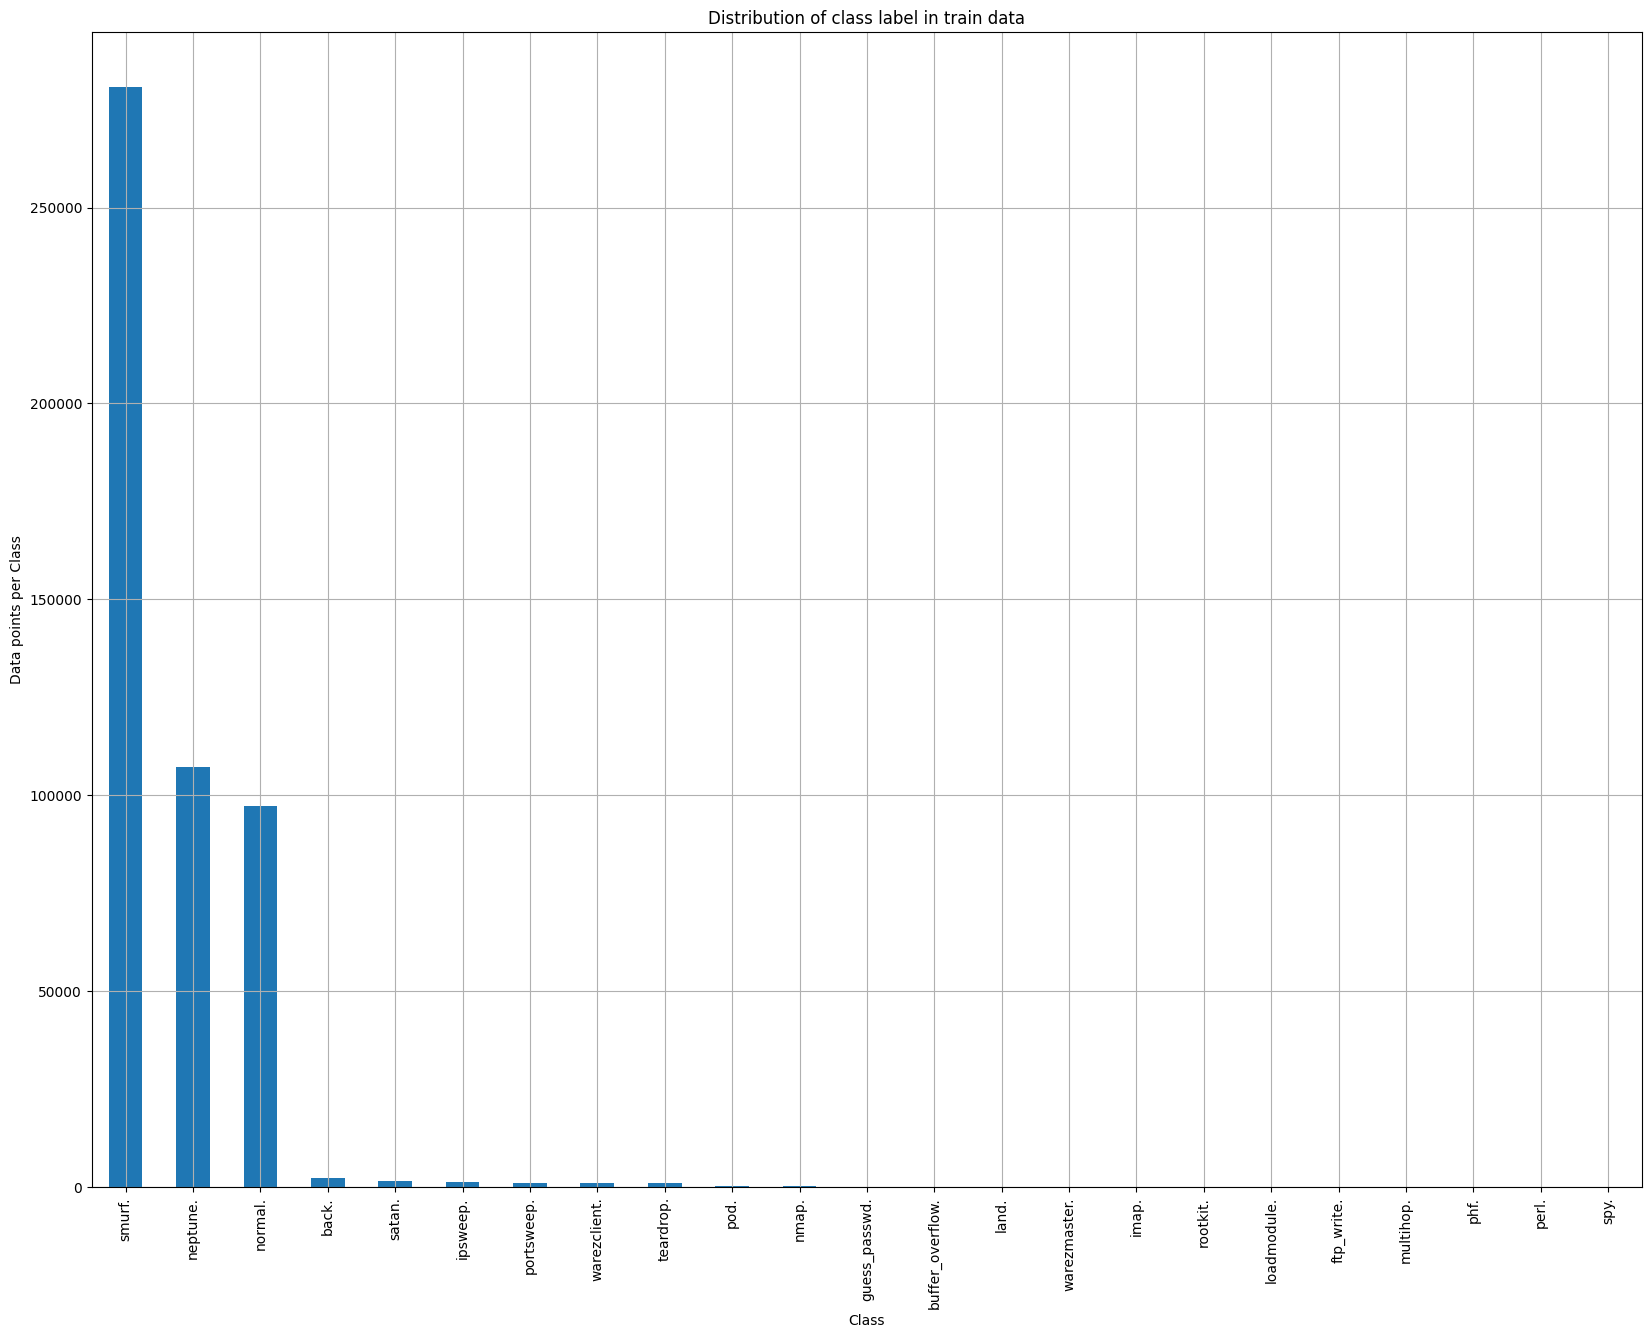

In [12]:
plt.figure(figsize=(20,15))
class_distribution = df['Class_label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of class label in train data')
plt.grid()
plt.show()

# Checking for duplicates and removing the duplicates

In [13]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
494016    False
494017    False
494018    False
494019    False
494020    False
Length: 494021, dtype: bool

In [14]:
df.duplicated().sum()

348435

In [15]:
#removing the duplicates
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(145586, 42)

# Plotting the distribution of Class label after removing duplicates

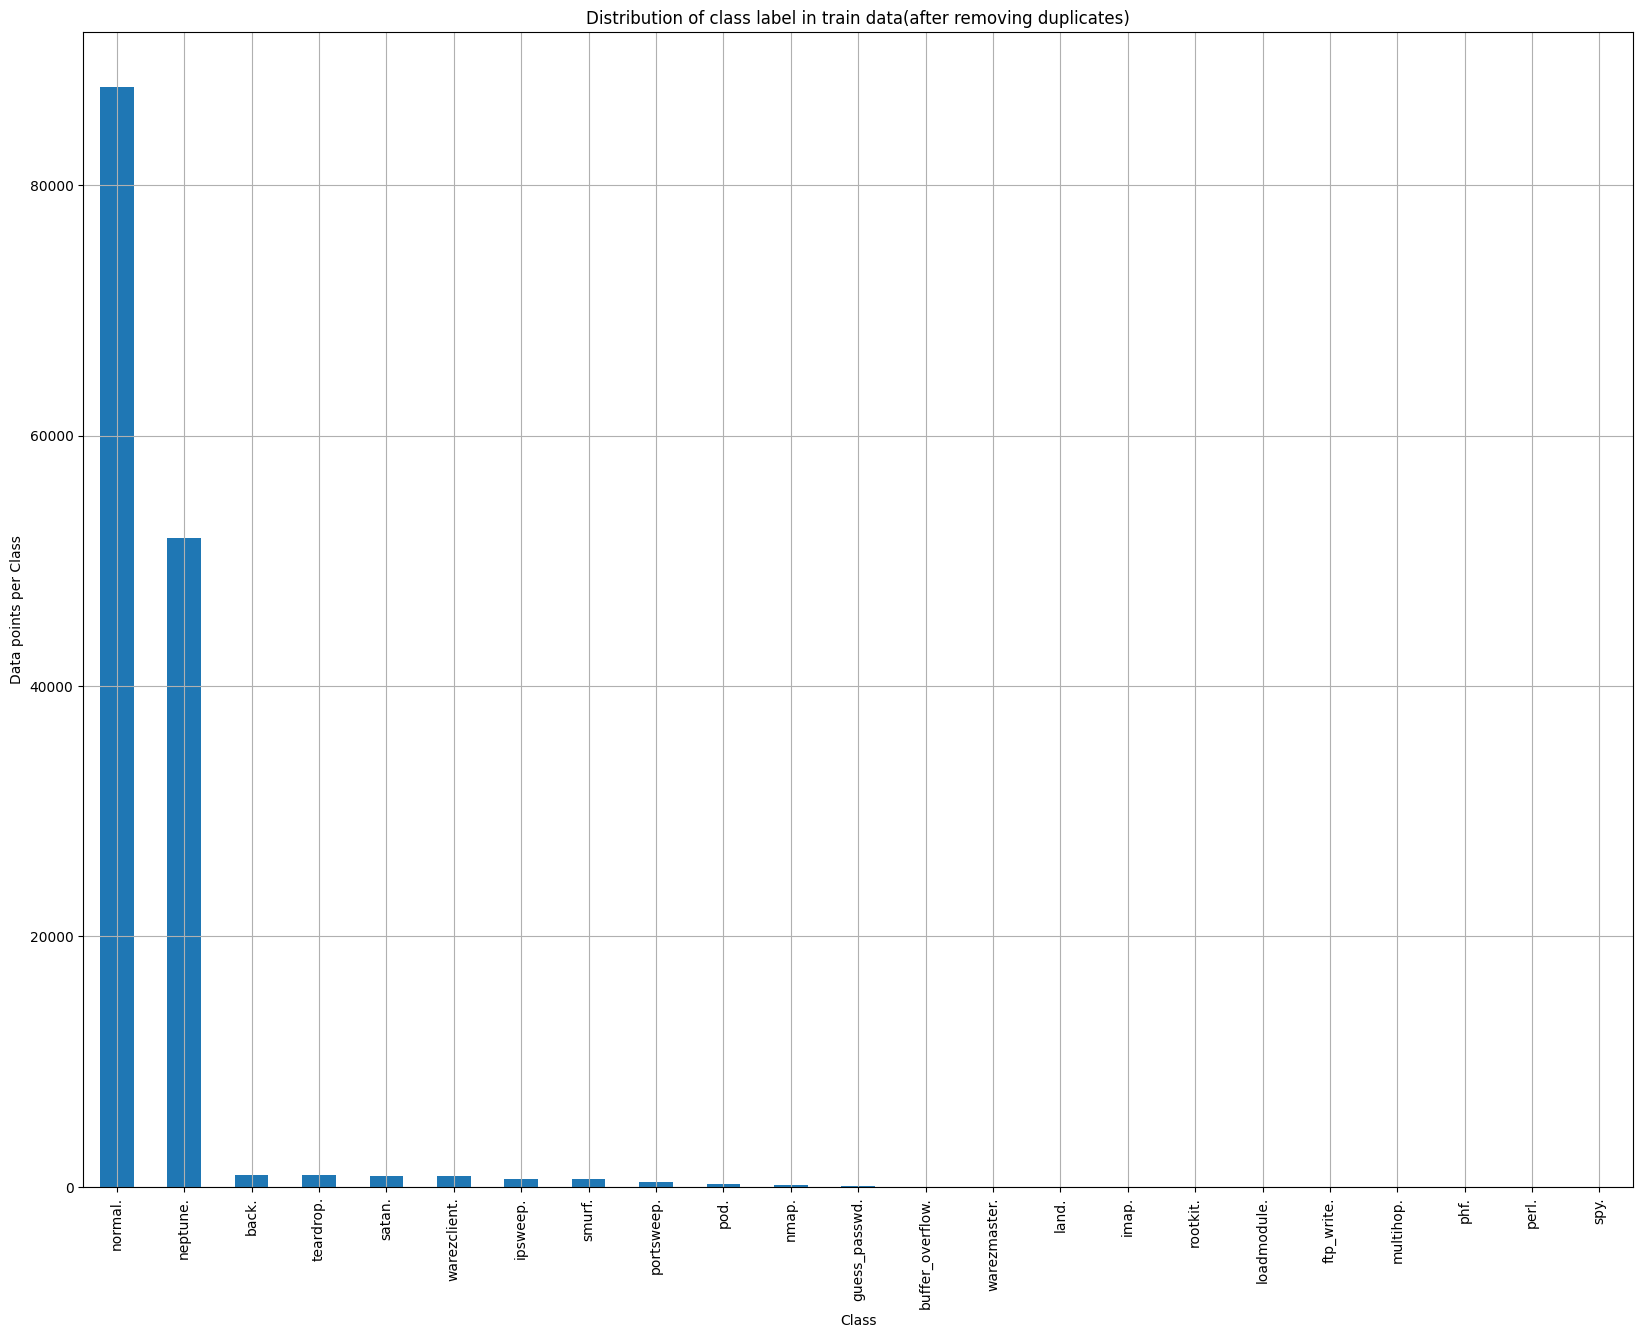

In [17]:
plt.figure(figsize=(20,15))
class_distribution = df['Class_label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of class label in train data(after removing duplicates)')
plt.grid()
plt.show()

# Value counts of the classlabel after removing duplicates

In [18]:
df['Class_label'].value_counts()

normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: Class_label, dtype: int64

# Changing attack labels to their respective attack class 

In [19]:
 df.Class_label.replace(['apache2.','back.','land.','neptune.','mailbomb.','pod.','processtable.','smurf.','teardrop.','udpstorm.','worm.'],'Dos',inplace=True)
df.Class_label.replace(['ftp_write.','guess_passwd.','httptunnel.','imap.','multihop.','named.','phf.','sendmail.',
       'snmpgetattack.','snmpguess.','spy.','warezclient.','warezmaster.','xlock.','xsnoop.'],'R2L',inplace=True)
df.Class_label.replace(['ipsweep.','mscan.','nmap.','portsweep.','saint.','satan.'],'Probe',inplace=True)
df.Class_label.replace(['buffer_overflow.','loadmodule.','perl.','ps.','rootkit.','sqlattack.','xterm.'],'U2R',inplace=True)


In [20]:
df['Class_label'].value_counts()

normal.    87832
Dos        54572
Probe       2131
R2L          999
U2R           52
Name: Class_label, dtype: int64

 # Exploratory data Analysis

## Descriptive Statistics of the data

In [21]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145586.000000,1.455860e+05,1.455860e+05,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,...,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000
mean,132.025181,7.995700e+03,2.859780e+03,0.000137,0.020201,0.000048,0.100174,0.000515,0.491490,0.026177,...,181.468177,129.934678,0.553222,0.061389,0.092825,0.019048,0.291597,0.290978,0.110463,0.107675
std,1224.157053,1.820383e+06,6.080979e+04,0.011720,0.239368,0.010150,1.426798,0.028585,0.499929,3.311373,...,99.098197,114.714829,0.456236,0.147021,0.241123,0.060410,0.452492,0.453447,0.306097,0.304220
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.164750e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Univariate Analysis (all categorical variables)

<Axes: xlabel='flag', ylabel='count'>

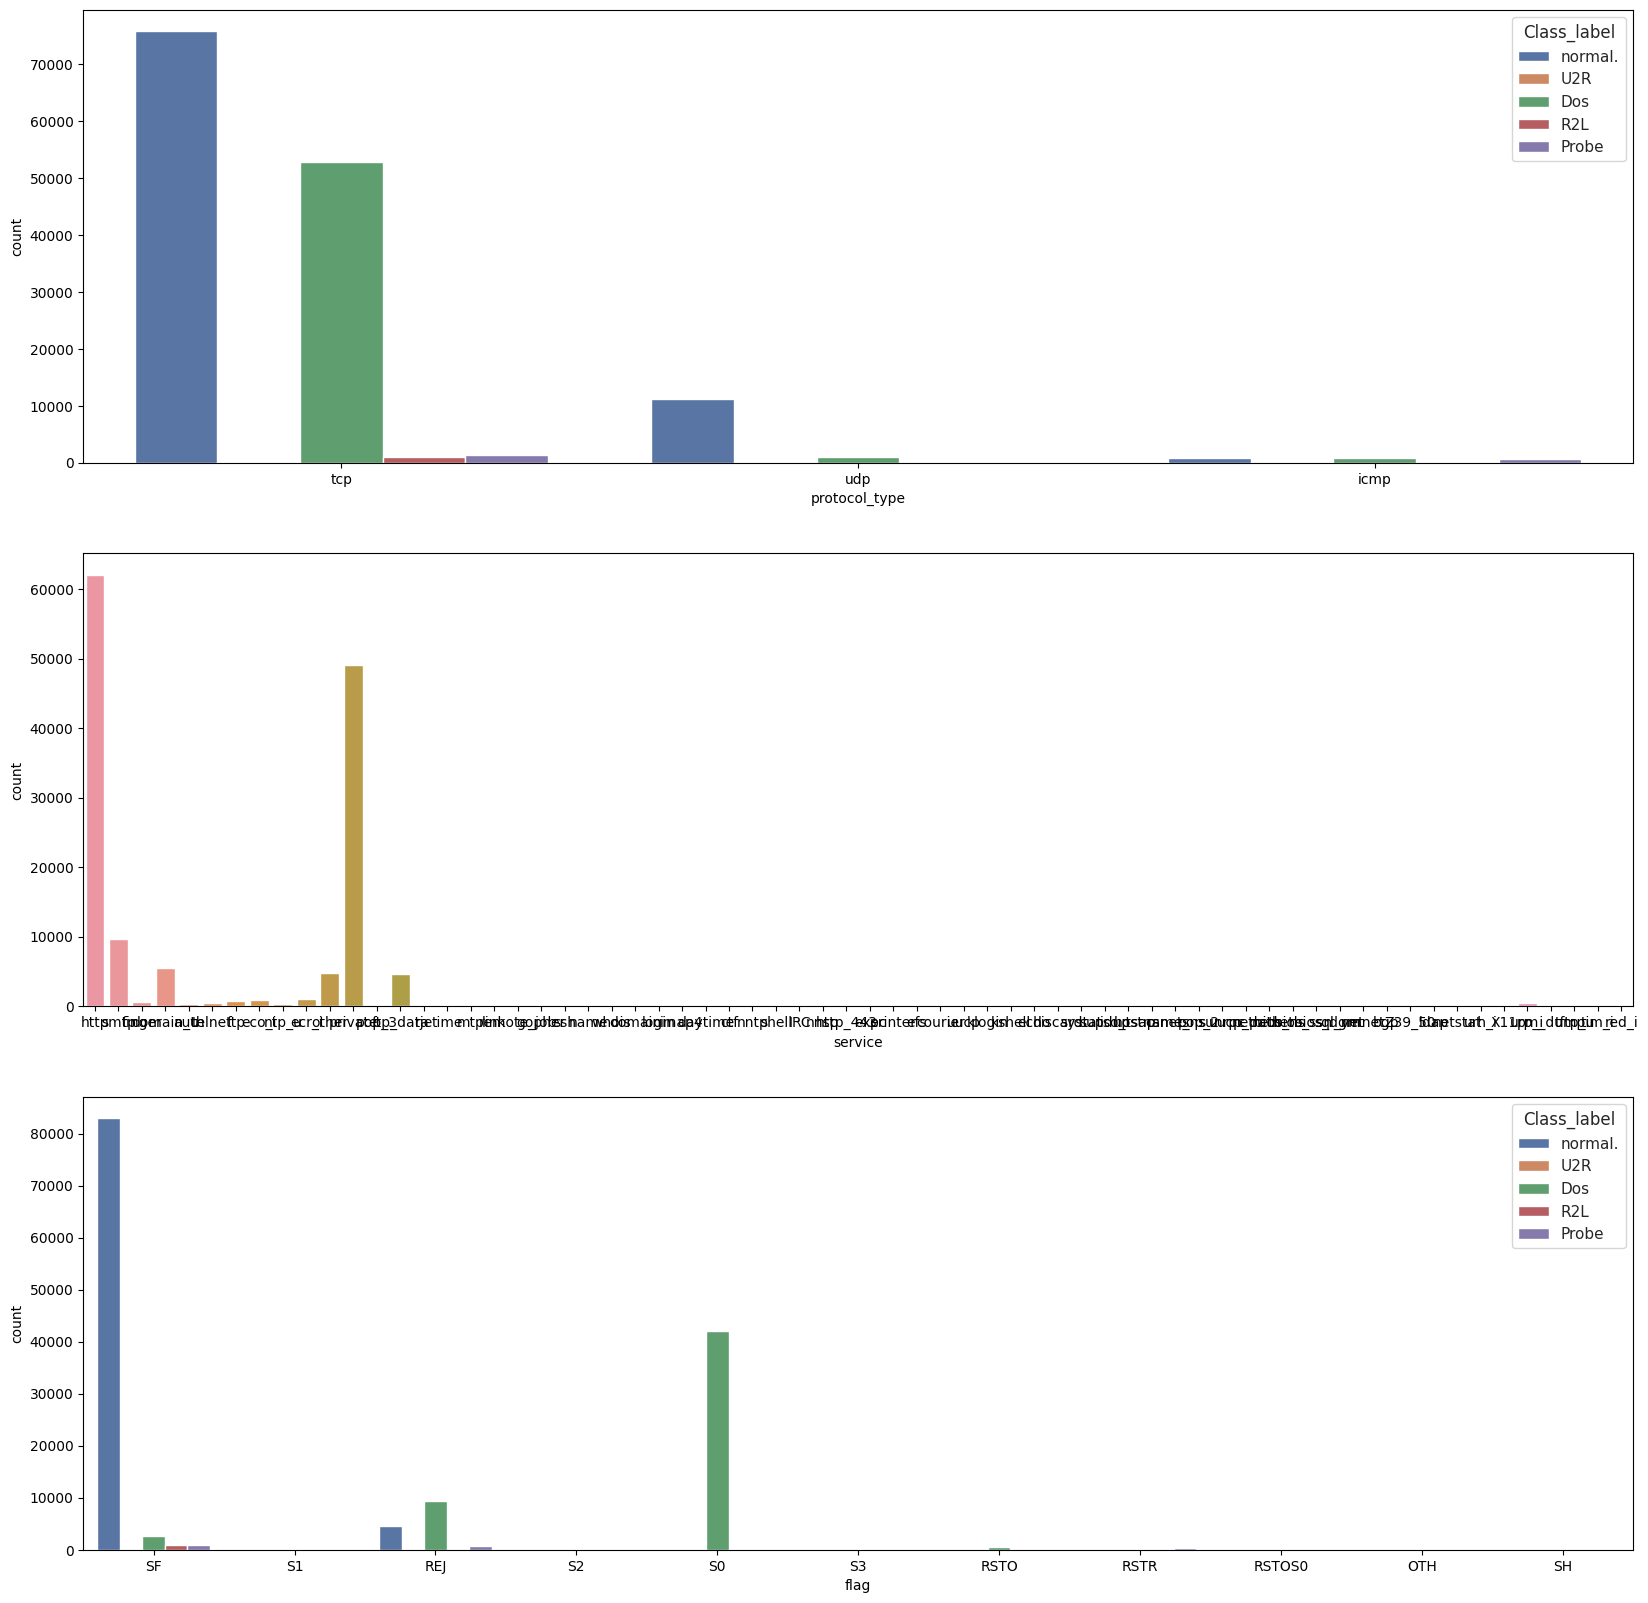

In [22]:
fig,axes = plt.subplots(3,1,figsize=(20,20))
sns.set(style="whitegrid")
sns.countplot(ax = axes[0],x=df['protocol_type'],hue=df['Class_label'])
sns.countplot(ax=axes[1],x=df['service'])
sns.countplot(ax=axes[2],x=df['flag'],hue=df['Class_label'])

# Bivariate Analysis

In [23]:
#sns.pairplot(df,hue='Class_label')

# One hot Encoding of the Categorical Variables(protocol_type,service,flag)

In [24]:
df = pd.get_dummies(df,columns=['protocol_type','service','flag'])

In [25]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Standardizing the numerical features

In [26]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [27]:
num_cols.shape

(38,)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [29]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.10785,-0.004293,0.042596,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,0,0,0,0,0,0,0,0,1,0
1,-0.10785,-0.004261,-0.039036,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,0,0,0,0,0,0,0,0,1,0
2,-0.10785,-0.004263,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,0,0,0,0,0,0,0,0,1,0
3,-0.10785,-0.004272,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,0,0,0,0,0,0,0,0,1,0
4,-0.10785,-0.004273,-0.013613,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.10785,-0.004222,-0.016096,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,0,0,0,0,0,0,0,0,1,0
494017,-0.10785,-0.004237,-0.009436,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,0,0,0,0,0,0,0,0,1,0
494018,-0.10785,-0.004281,-0.027295,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,0,0,0,0,0,0,0,0,1,0
494019,-0.10785,-0.004232,-0.027295,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017168,-0.007905,...,0,0,0,0,0,0,0,0,1,0


# Feature Extraction 

## Pearson correlation

In [30]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(df.Class_label.map(lambda x:'normal' if x=='normal.' else 'abnormal'))

In [31]:
df_PC = df.copy()
df_PC['Class_label']=bin_label

In [32]:
#Labelencoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_PC['Intrusion'] = encoder.fit_transform(df_PC['Class_label'])

In [33]:
num_cols = df_PC.select_dtypes(include=['float64', 'int64',]).columns

In [34]:
corr= df_PC[num_cols].corr()
corr_y = abs(corr['Intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

dst_host_count              0.520493
logged_in                   0.742836
srv_serror_rate             0.787301
dst_host_srv_serror_rate    0.788136
dst_host_serror_rate        0.788309
serror_rate                 0.788613
dst_host_srv_count          0.791325
count                       0.805478
dst_host_same_srv_rate      0.810683
same_srv_rate               0.912880
Intrusion                   1.000000
Name: Intrusion, dtype: float64

In [35]:
features_PC = ['dst_host_count','logged_in','srv_serror_rate','dst_host_srv_serror_rate','dst_host_serror_rate','serror_rate','dst_host_srv_count','count','dst_host_same_srv_rate','same_srv_rate']

In [36]:
len(features_PC)

10

## TNSE t-Distributed Stochastic Neighbor Embedding

In [37]:
df_TNSE = df.copy()
num_cols = df_TNSE.select_dtypes(include=['float64', 'int64','uint8']).columns

In [38]:
num_cols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=118)

In [39]:
from sklearn.manifold import TSNE

# Create T-SNE model and fit to data
tsne = TSNE(n_components=2, perplexity=100, learning_rate=500)
X = tsne.fit_transform(df_TNSE[num_cols])
df_TNSE_fit = pd.DataFrame({'Feature1': X[:, 0], 'Feature2': X[:, 1],'Class_label': df['Class_label']})

In [40]:
df_TNSE_fit

,Feature1,Feature2,Class_label
0,-12.106568,-0.577487,normal.
1,-12.316087,-0.994274,normal.
2,-12.531002,-1.378060,normal.
3,-12.735091,-1.769173,normal.
4,-13.054356,-2.239391,normal.
...,...,...,...
494016,-27.042032,16.061480,normal.
494017,-61.577564,7.271066,normal.
494018,-39.771999,8.188757,normal.
494019,-36.659916,8.537138,normal.


<Axes: xlabel='Feature1', ylabel='Feature2'>

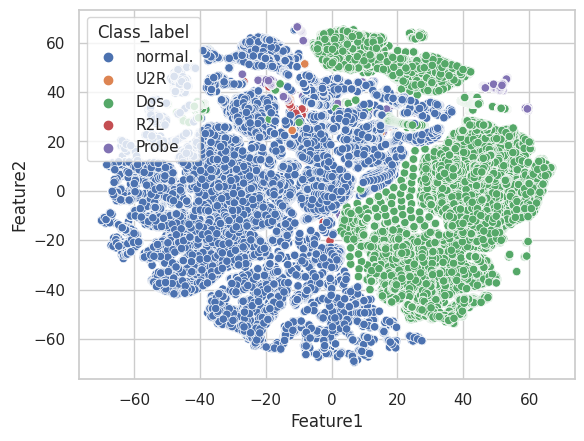

In [41]:
#Plot the results 
sns.scatterplot(x=df_TNSE_fit['Feature1'],y=df_TNSE_fit['Feature2'],hue=df_TNSE_fit['Class_label'])

## PCA

<Axes: >

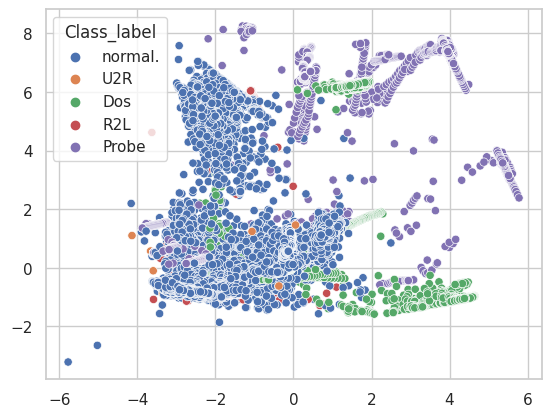

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_TNSE[num_cols])
X_reduced = pca.transform(df_TNSE[num_cols])
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],hue=df_TNSE_fit['Class_label'])

In [43]:
X_reduced.shape

(145586, 2)

# Machine learning model 

In [44]:
# Training dataset
cat_columns = df.select_dtypes(include=['uint8']).columns

In [45]:
features_PC.extend(cat_columns)

In [46]:
len(features_PC)

90

In [47]:
encoder = LabelEncoder()
df_PC['Intrusion_multiclass'] = encoder.fit_transform(df['Class_label'])

In [48]:
df_PC['Intrusion_multiclass'].value_counts()

4    87832
0    54572
1     2131
2      999
3       52
Name: Intrusion_multiclass, dtype: int64

In [49]:
#Multiclass classification 
X = df[features_PC].values
Y = df_PC['Intrusion_multiclass'].values

In [50]:
# Preparing the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

## KNN Classifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train) #training the model

KNeighborsClassifier(n_neighbors=2)

In [129]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [181]:
y_pred=knn.predict(X_test)  # predicting target attribute on testing dataset within kddcup.data_10_percent.csv
kn=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Multi-class Set-Accuracy is ", kn)

KNN-Classifier Multi-class Set-Accuracy is  98.51086628018793


**Plot Actual vs Predicted**

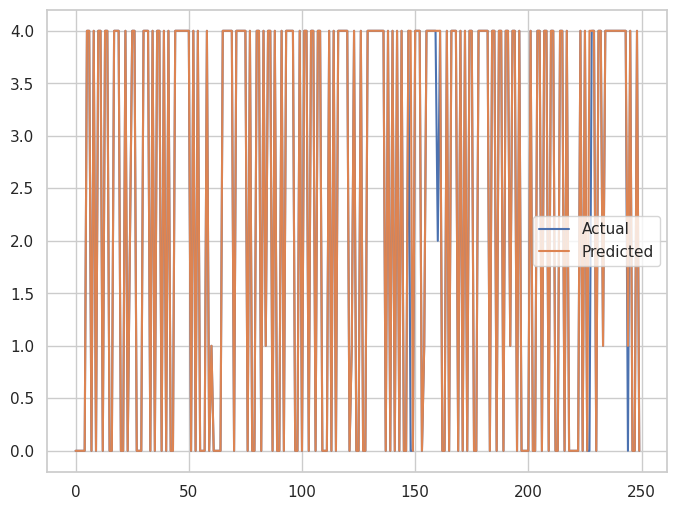

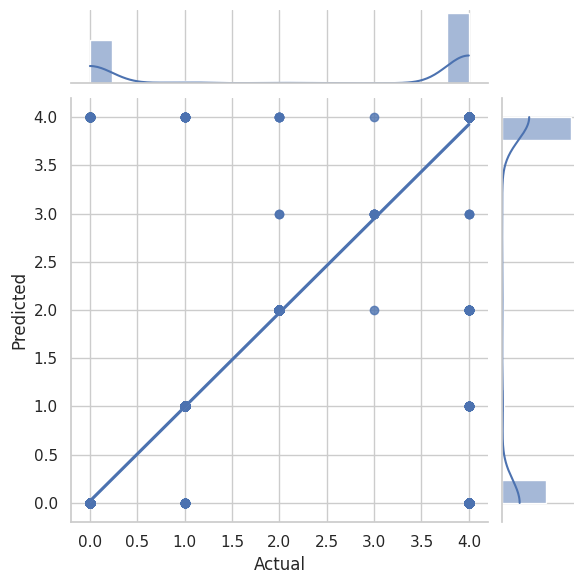

In [131]:
tst = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(8,6))
tst = tst.reset_index()
tst = tst.drop(['index'],axis=1)
plt.plot(tst[:250])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=tst,kind="reg")

***Confusion matrix to test the performance of classification***

In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm

array([[9.95597623e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.40237728e-03],
       [3.46083789e-02, 9.43533698e-01, 0.00000000e+00, 0.00000000e+00,
        2.18579235e-02],
       [0.00000000e+00, 0.00000000e+00, 9.69565217e-01, 8.69565217e-03,
        2.17391304e-02],
       [0.00000000e+00, 0.00000000e+00, 1.11111111e-01, 7.77777778e-01,
        1.11111111e-01],
       [1.81983621e-02, 7.27934486e-04, 1.04640582e-03, 1.36487716e-04,
        9.79890810e-01]])

Text(53.75, 0.5, 'Actual')

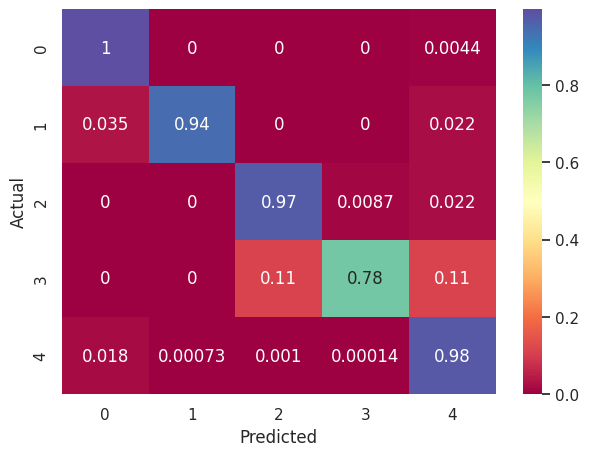

In [133]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap="Spectral")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13629
           1       0.97      0.94      0.96       549
           2       0.90      0.97      0.94       230
           3       0.58      0.78      0.67         9
           4       1.00      0.98      0.99     21980

    accuracy                           0.99     36397
   macro avg       0.88      0.93      0.91     36397
weighted avg       0.99      0.99      0.99     36397



## Support Vector Machine (Linear)

In [135]:
from sklearn.svm import SVC
model = SVC(kernel='linear', gamma = 0.01 , C=1000)
model.fit(X_train,y_train)

SVC(C=1000, gamma=0.01, kernel='linear')

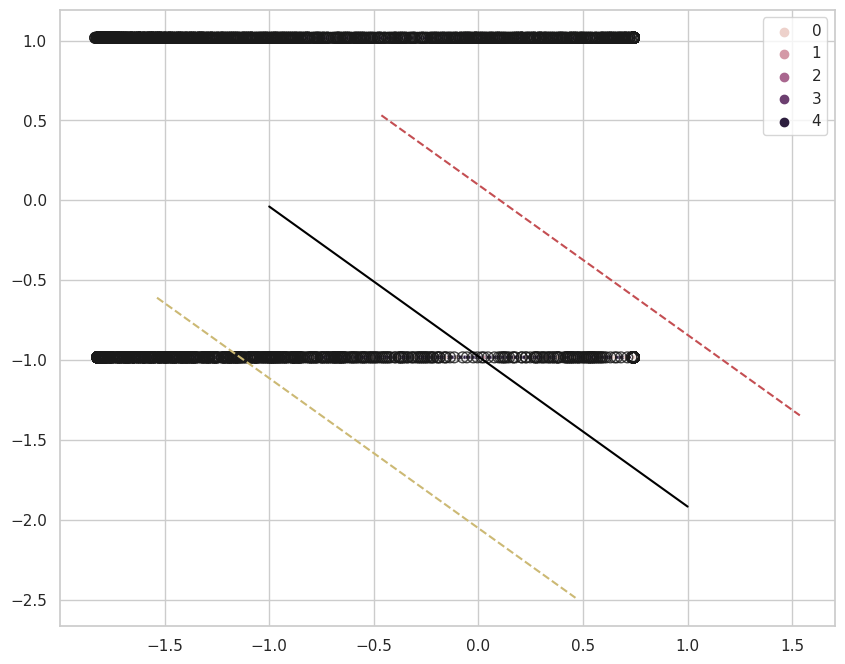

In [136]:
plt.figure(figsize=(10, 8))

# Plot of our features
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, s=6)

# Hyperplane
w = model.coef_[0][:2]
b = model.intercept_[0]

# Decision boundary: w0*x0 + w1*w2 + b = 0
# x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(-1, 1)
dec_bd = -(w[0] / w[1]) * x0 - b / w[1]

# Plotting hyperplane
plt.plot(x0, dec_bd, c='black')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=60, facecolors='none', edgecolors='k', alpha=.8)

# To determine unit vector
wt = w / (np.sqrt(np.sum(w ** 2)))

# Margin calculation
mc = 1 / np.sqrt(np.sum(w ** 2))

# Calculating points
m_pts = np.array(list(zip(x0, dec_bd)))
pos = m_pts + wt * mc
neg = m_pts - wt * mc

# Ploting margin lines
plt.plot(pos[:, 0], pos[:, 1], 'r--')
plt.plot(neg[:, 0], neg[:, 1], 'y--')

plt.show()


In [182]:
y_pred = model.predict(X_test) # predicting target attribute on testing dataset
sv = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", sv)

LSVM-Classifier Binary Set-Accuracy is  98.58504821825976


**Plot Act vs Pred**

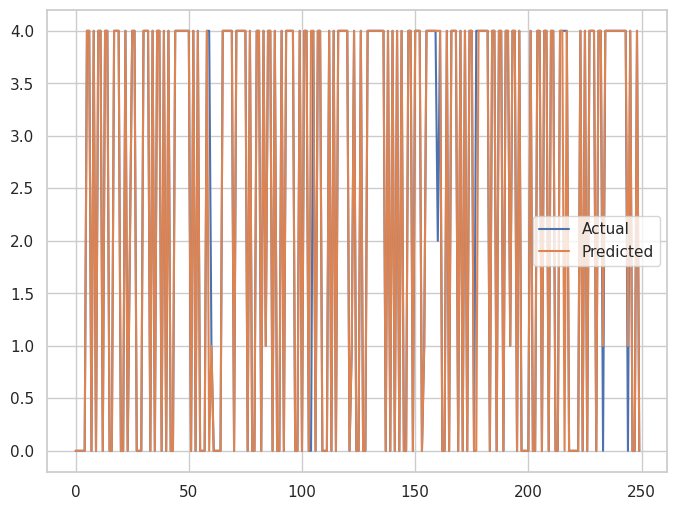

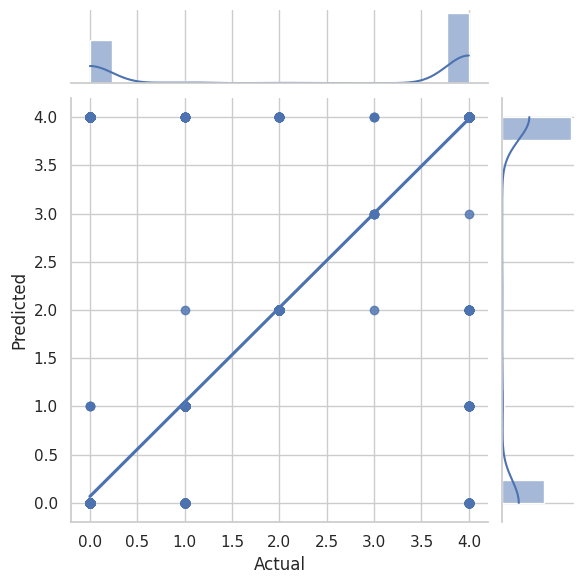

In [138]:
tst = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(8,6))
tst = tst.reset_index()
tst = tst.drop(['index'],axis=1)
plt.plot(tst[:250])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=tst,kind="reg")

**Confusion Matrix**

Text(53.75, 0.5, 'Actual')

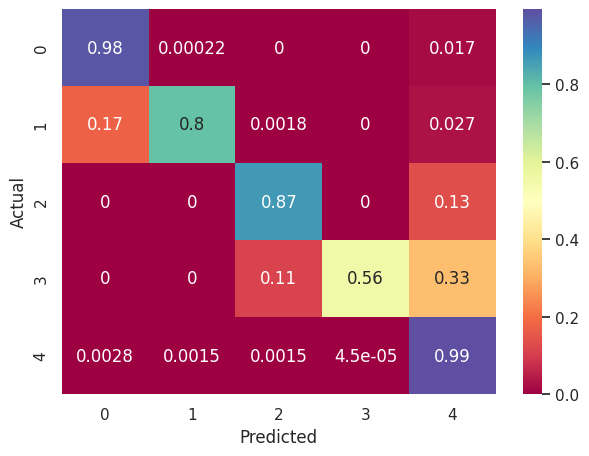

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap="Spectral")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     13629
           1       0.92      0.80      0.86       549
           2       0.85      0.87      0.86       230
           3       0.83      0.56      0.67         9
           4       0.99      0.99      0.99     21980

    accuracy                           0.99     36397
   macro avg       0.92      0.84      0.87     36397
weighted avg       0.99      0.99      0.99     36397



## Quadratic Support Vector Machine Classifier

In [148]:
qsvm=SVC(kernel="poly", degree=3, coef0=1, C=5) # using kernal as polynomial for quadratic svm
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(C=5, coef0=1, kernel='poly')

In [184]:
y_pred=qsvm.predict(X_test) # predicting target attribute on testing dataset
ps=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Set-Accuracy is ", ps)    

QSVM-Classifier Set-Accuracy is  99.0933318680111


**Plot Act vs Pred**

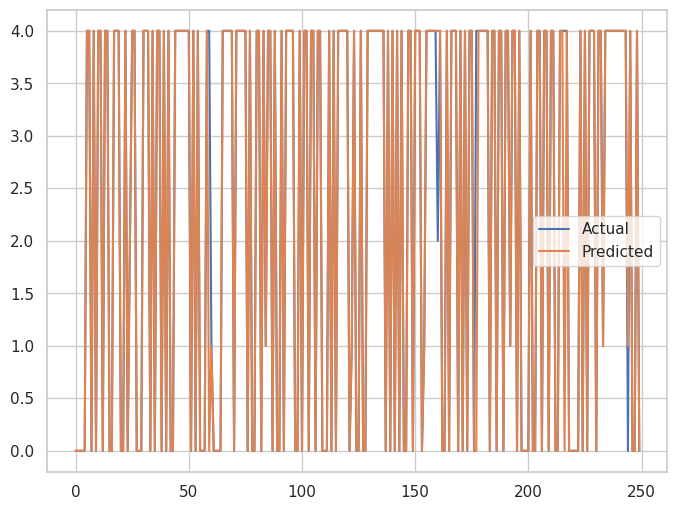

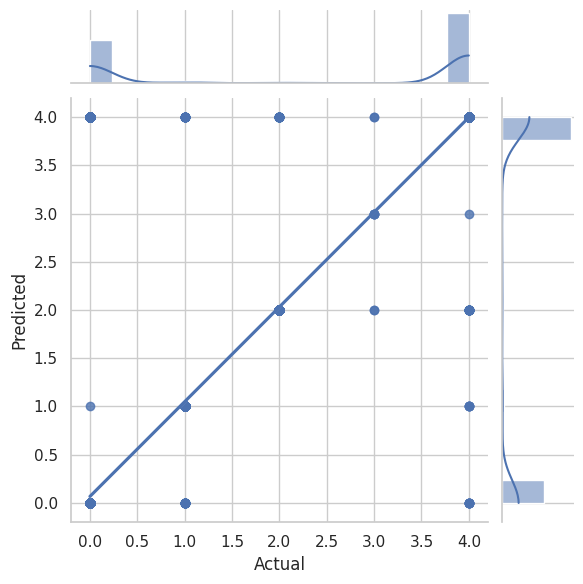

In [150]:
tst = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(8,6))
tst = tst.reset_index()
tst = tst.drop(['index'],axis=1)
plt.plot(tst[:250])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=tst,kind="reg")

**Confusion Matrix**

Text(53.75, 0.5, 'Actual')

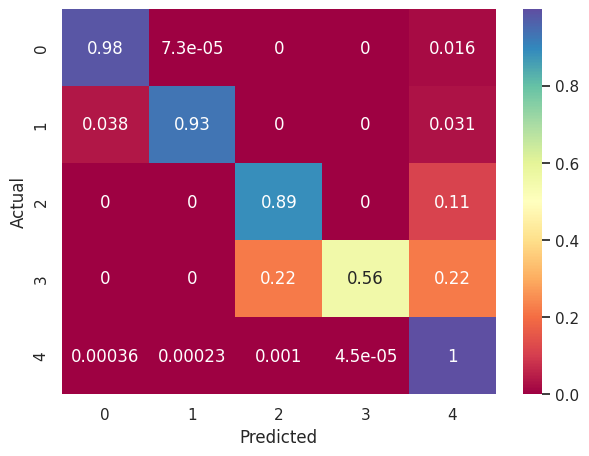

In [151]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap="Spectral")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     13629
           1       0.99      0.93      0.96       549
           2       0.89      0.89      0.89       230
           3       0.83      0.56      0.67         9
           4       0.99      1.00      0.99     21980

    accuracy                           0.99     36397
   macro avg       0.94      0.87      0.90     36397
weighted avg       0.99      0.99      0.99     36397



## Linear Discriminant Analysis Classifier

In [153]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [154]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)  # training model on training dataset

LinearDiscriminantAnalysis()

In [185]:
y_pred = lda.predict(X_test) # predicting target attribute on testing dataset
ld =accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ld)

LDA-Classifier Set-Accuracy is  96.90084347611067


**Plot Act vs Pred**

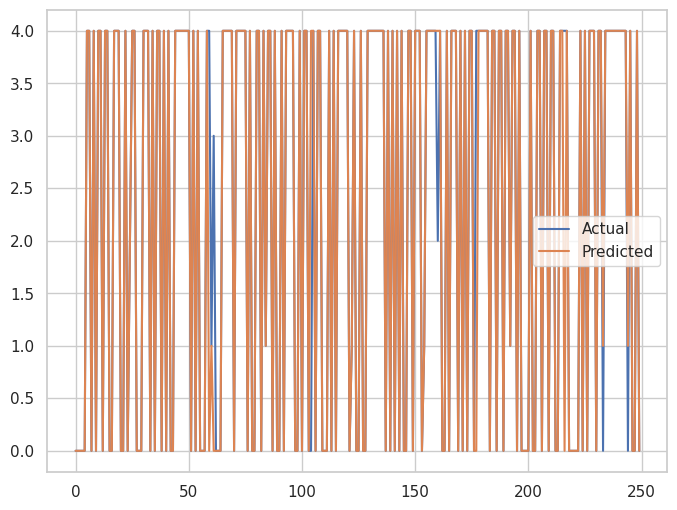

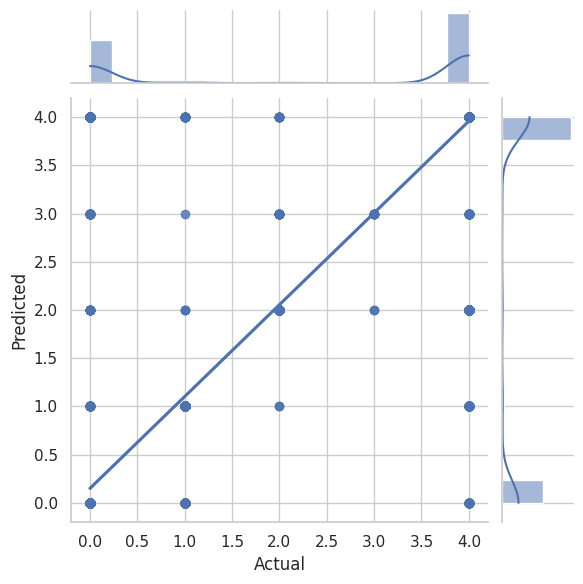

In [156]:
tst = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(8,6))
tst = tst.reset_index()
tst = tst.drop(['index'],axis=1)
plt.plot(tst[:250])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=tst,kind="reg")

**Confusion Matrix**

Text(53.75, 0.5, 'Actual')

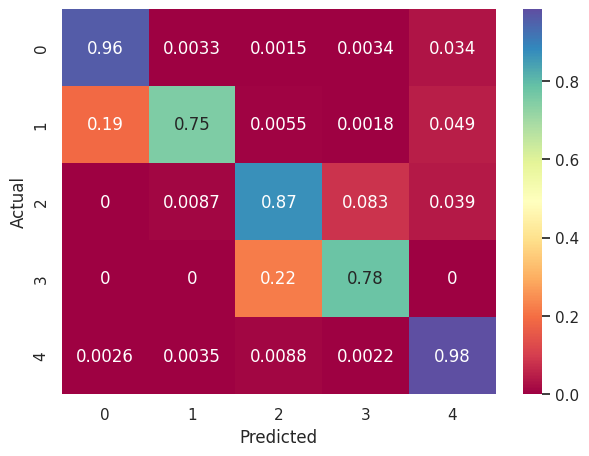

In [157]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap="Spectral")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     13629
           1       0.77      0.75      0.76       549
           2       0.48      0.87      0.62       230
           3       0.06      0.78      0.11         9
           4       0.98      0.98      0.98     21980

    accuracy                           0.97     36397
   macro avg       0.65      0.87      0.69     36397
weighted avg       0.97      0.97      0.97     36397



## Quadratic Discriminant Analysis Classifier

In [159]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [160]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [186]:
y_pred = qda.predict(X_test) # predicting target attribute on testing dataset
qd=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Set-Accuracy is ", qd)

QDA-Classifier Set-Accuracy is  33.0961342967827


**Plot Act vs Pred**

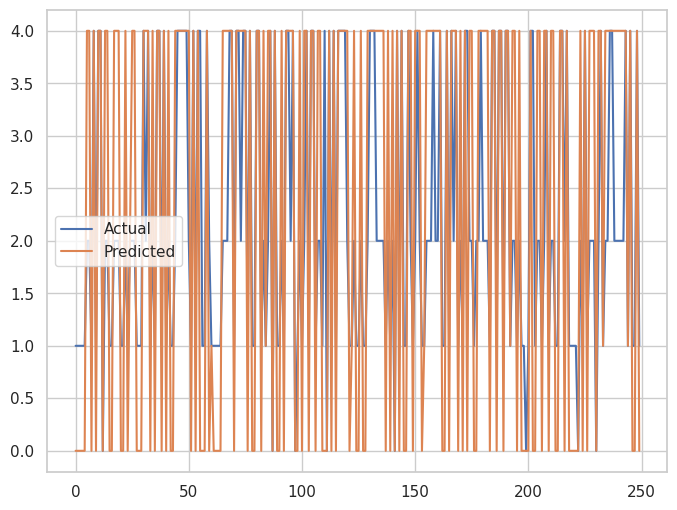

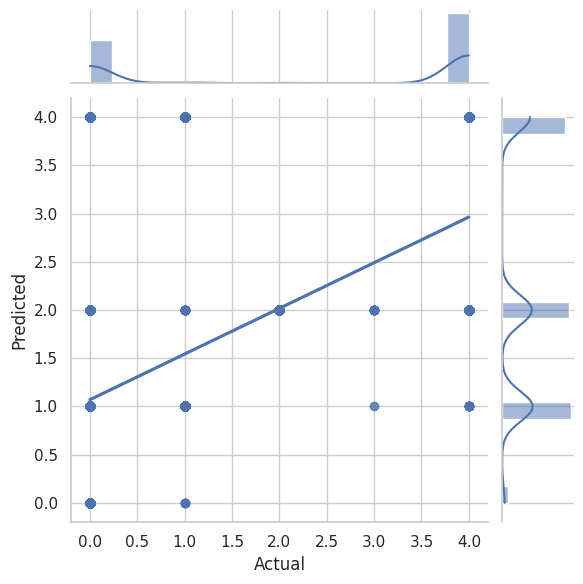

In [162]:
tst = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(8,6))
tst = tst.reset_index()
tst = tst.drop(['index'],axis=1)
plt.plot(tst[:250])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=tst,kind="reg")

**Confusion Matrix**

Text(53.75, 0.5, 'Actual')

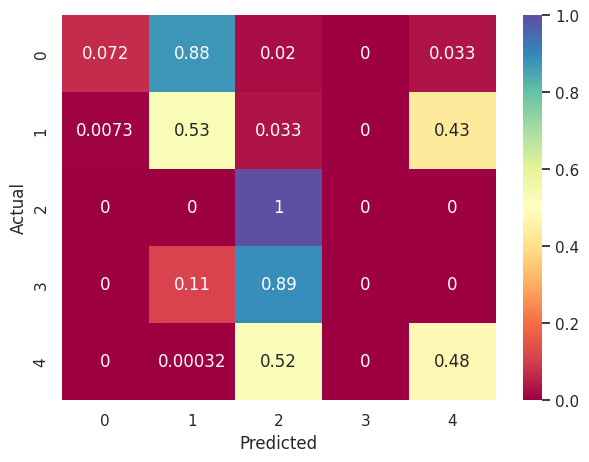

In [163]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap="Spectral")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [164]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13     13629
           1       0.02      0.53      0.05       549
           2       0.02      1.00      0.04       230
           3       0.00      0.00      0.00         9
           4       0.94      0.48      0.64     21980

    accuracy                           0.33     36397
   macro avg       0.40      0.42      0.17     36397
weighted avg       0.94      0.33      0.43     36397



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes

In [142]:
from sklearn.naive_bayes import GaussianNB

In [143]:
nb = GaussianNB()
nb.fit(X_train, y_train) # training model on training dataset

GaussianNB()

In [187]:
y_pred = nb.predict(X_test) # predicting target attribute on testing dataset
ns=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("Gaussian Naive Bayes Set-Accuracy is ", ns)

Gaussian Naive Bayes Set-Accuracy is  58.46086215896915


**Plot Act vs Pred**

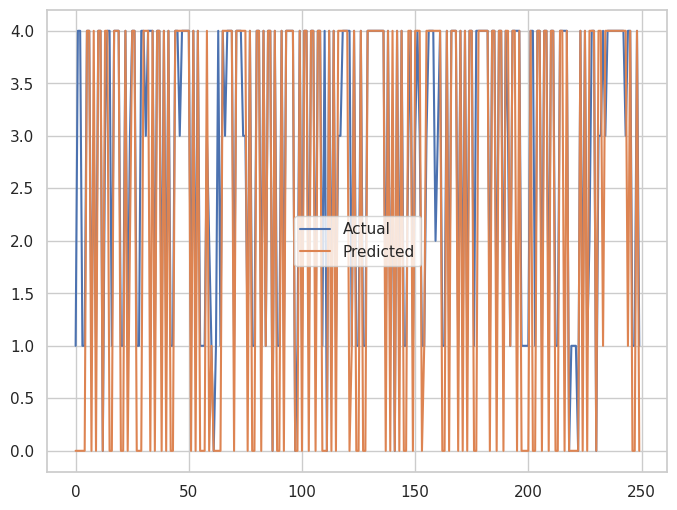

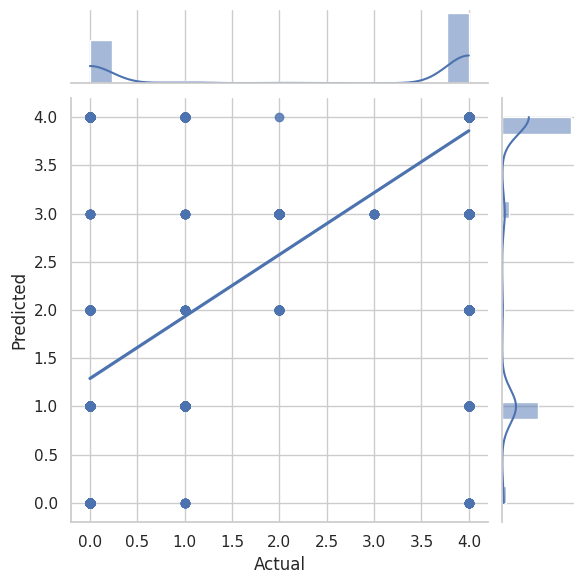

In [145]:
tst = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(8,6))
tst = tst.reset_index()
tst = tst.drop(['index'],axis=1)
plt.plot(tst[:250])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=tst,kind="reg")

**Confusion Matrix**

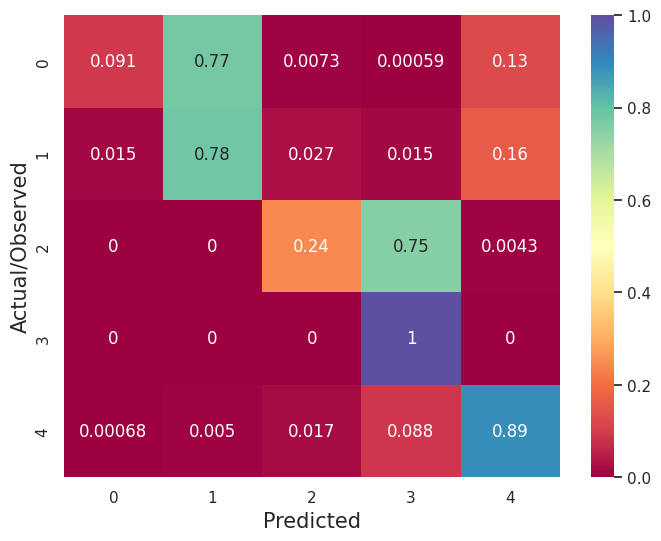

In [146]:
c_mat = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize = (8,6))
sns.heatmap(c_mat, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.09      0.17     13629
           1       0.04      0.78      0.07       549
           2       0.10      0.24      0.14       230
           3       0.00      1.00      0.01         9
           4       0.91      0.89      0.90     21980

    accuracy                           0.58     36397
   macro avg       0.41      0.60      0.26     36397
weighted avg       0.92      0.58      0.61     36397



## Decision tree

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)  #training model on training dataset

DecisionTreeClassifier()

In [188]:
y_pred = dt.predict(X_test) # predicting target attribute on testing dataset
dc=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("Decision tree classifier Set-Accuracy is ", dc)

Decision tree classifier Set-Accuracy is  99.27466549440888


**Plot Act vs Pred**

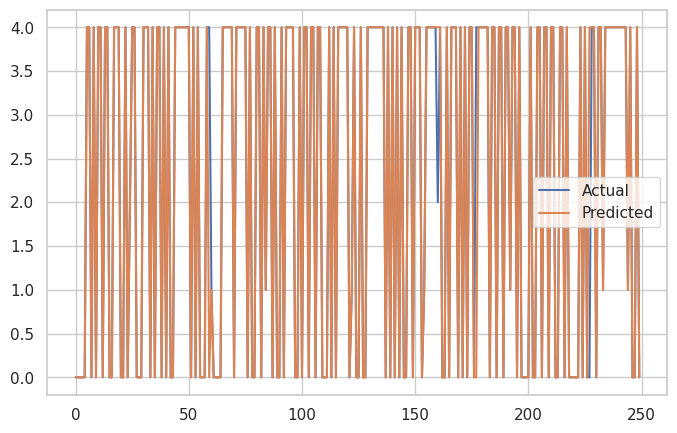

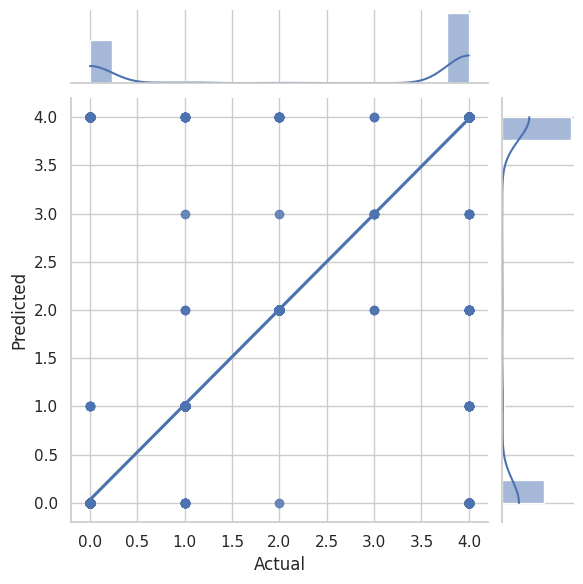

In [106]:
tst = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(8,5))
tst = tst.reset_index()
tst = tst.drop(['index'],axis=1)
plt.plot(tst[:250])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=tst,kind="reg")

**Confusion Matrix**

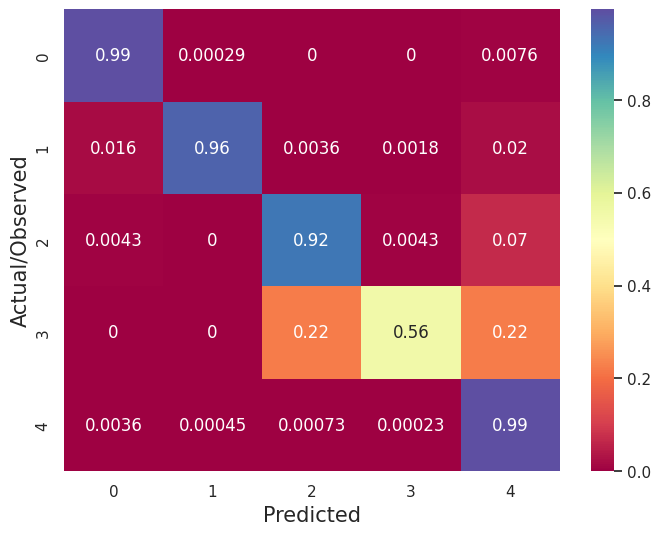

In [107]:
c_mat = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize = (8,6))
sns.heatmap(c_mat, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13629
           1       0.97      0.96      0.97       549
           2       0.91      0.92      0.92       230
           3       0.42      0.56      0.48         9
           4       0.99      0.99      0.99     21980

    accuracy                           0.99     36397
   macro avg       0.86      0.88      0.87     36397
weighted avg       0.99      0.99      0.99     36397



## Logistic regression 

In [109]:
from sklearn.linear_model import LogisticRegression

In [114]:
lr = LogisticRegression(C=10, solver='liblinear')
lr.fit(X_train,y_train)  #training model on training dataset

LogisticRegression(C=10, solver='liblinear')

In [189]:
y_pred = lr.predict(X_test) # predicting target attribute on testing dataset
lc=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("Logistic regression classifier Set-Accuracy is ", lc)

Logistic regression classifier Set-Accuracy is  98.35425996648075


**Plot Act vs Pred**

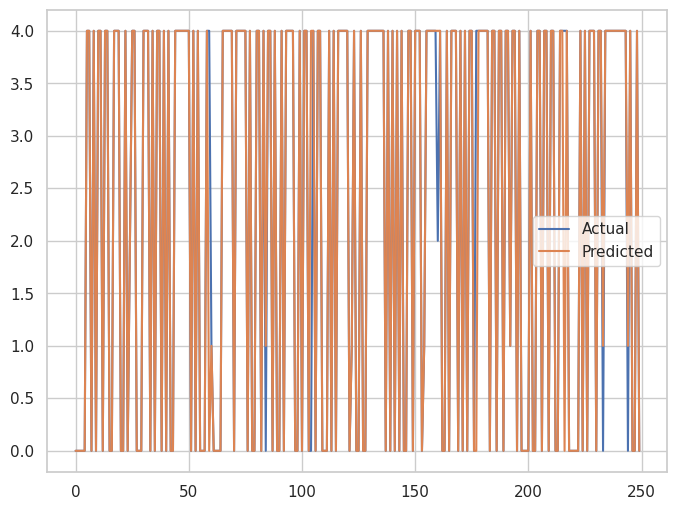

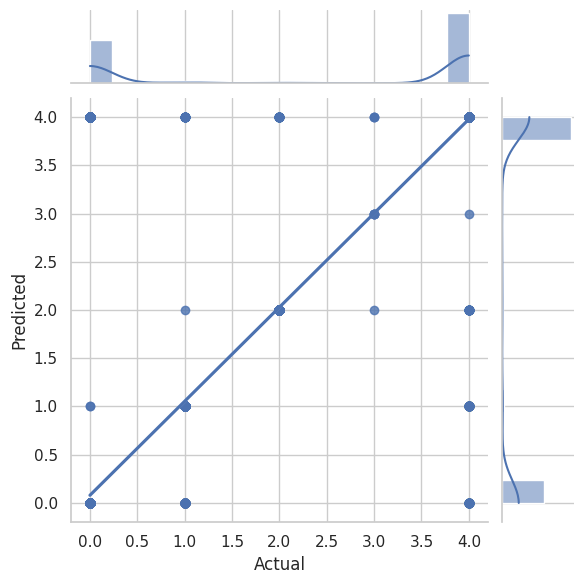

In [116]:
tst = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(8,6))
tst = tst.reset_index()
tst = tst.drop(['index'],axis=1)
plt.plot(tst[:250])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=tst,kind="reg")

**Confusion Matrix**

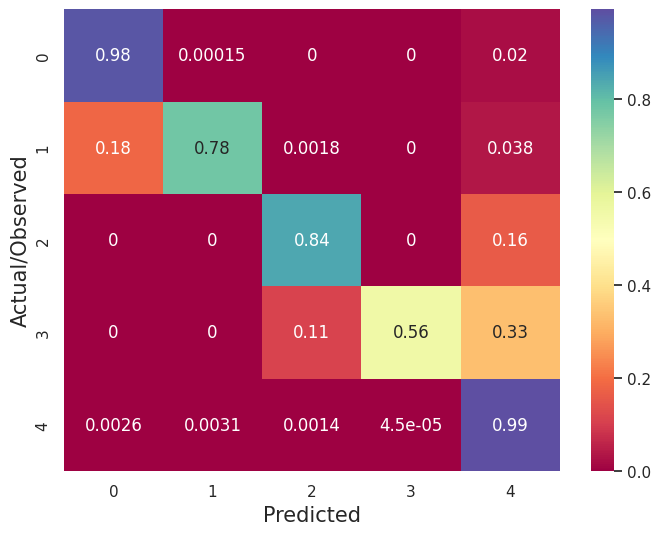

In [117]:
c_mat = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize = (8,6))
sns.heatmap(c_mat, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     13629
           1       0.86      0.78      0.82       549
           2       0.85      0.84      0.85       230
           3       0.83      0.56      0.67         9
           4       0.98      0.99      0.99     21980

    accuracy                           0.98     36397
   macro avg       0.90      0.83      0.86     36397
weighted avg       0.98      0.98      0.98     36397



In [190]:
from prettytable import PrettyTable

In [191]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Accuracy"]
x.add_row(["KNN Model", round(kn,2)])
x.add_row(["Linear SVM Model", round(sv,2)])
x.add_row(["Quadratic SVM Model", round(ps,2)])
x.add_row(["Linear Discriminant Analysis Classifier Model", round(ld,2)])
x.add_row(["Quadratic Discriminant Analysis Classifier", round(qd,2)])
x.add_row(["Naive Bayes Model", round(ns,2)])
x.add_row(["Decision tree Classifier Model", round(dc,2)])
x.add_row(["Logistic regression", round(lc,2)])

print(x)
print('\n')



+-----------------------------------------------+----------+
|                     Model                     | Accuracy |
+-----------------------------------------------+----------+
|                   KNN Model                   |  98.51   |
|                Linear SVM Model               |  98.59   |
|              Quadratic SVM Model              |  99.09   |
| Linear Discriminant Analysis Classifier Model |   96.9   |
|   Quadratic Discriminant Analysis Classifier  |   33.1   |
|               Naive Bayes Model               |  58.46   |
|         Decision tree Classifier Model        |  99.27   |
|              Logistic regression              |  98.35   |
+-----------------------------------------------+----------+




**Decision Tree model and Quadratic SVM model are giving us the highest accuracy with 99.27% and 99.09% while Quadratic Discriminant Analysis Classifier performed least with only 33.1% accuracy followed by Naive Bayes Model with 58.46% accuracy.**